In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Practice/Artificial_intelligence

/content/drive/MyDrive/Practice/Artificial_intelligence


## 데이터 불러오기
### 1-1 data 불러오기

In [5]:
# fires = pd.read_csv("sanbul2district-divby100.csv", sep=",")
fires = pd.read_csv("sanbul-5.csv", sep=",")

fires['burned_area'] = np.log(fires['burned_area'] + 1)

### 1-2 fires.head(), fires.info(), fires.describe(), 카테고리형 특성 month, day에 대해 value_counts() 출력하기


In [6]:
fires.head()

,latitude,longitude,month,day,avg_temp,max_temp,max_wind_speed,avg_wind,burned_area
0,37.814760,126.934555,12-Dec,04-thu,-11.2,-7.5,8.4,2.3,0.029559
1,37.902374,127.531013,11-Nov,02-tue,2.6,11.2,5.9,0.8,0.095310
2,37.815010,127.303115,03-Mar,05-fri,13.2,21.5,5.7,1.3,0.405465
3,37.645414,127.504775,02-Feb,06-sat,-4.0,1.1,10.4,2.5,0.262364
4,37.811693,127.514488,06-Jun,00-sun,23.0,32.1,6.7,1.7,0.076961


In [7]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        456 non-null    float64
 1   longitude       456 non-null    float64
 2   month           456 non-null    object 
 3   day             456 non-null    object 
 4   avg_temp        456 non-null    float64
 5   max_temp        456 non-null    float64
 6   max_wind_speed  456 non-null    float64
 7   avg_wind        456 non-null    float64
 8   burned_area     456 non-null    float64
dtypes: float64(7), object(2)
memory usage: 32.2+ KB


In [8]:
fires.describe()

,latitude,longitude,avg_temp,max_temp,max_wind_speed,avg_wind,burned_area
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,37.554922,127.152073,9.810088,17.717763,7.692982,1.601316,0.196320
std,0.289899,0.267260,8.278386,8.878393,2.073081,0.581168,0.279938
min,36.878411,126.447779,-15.400000,-10.600000,3.600000,0.500000,0.009950
25%,37.339854,126.934403,5.075000,12.475000,6.100000,1.200000,0.019803
50%,37.561472,127.176612,9.500000,17.800000,7.400000,1.500000,0.095310
75%,37.786237,127.343083,14.800000,23.925000,8.800000,1.900000,0.262364
max,38.178624,127.743580,30.200000,36.800000,16.600000,3.900000,2.079442


In [9]:
print(fires['month'].value_counts())


month
03-Mar    171
04-Apr    100
02-Feb     45
06-Jun     40
05-May     37
01-Jan     15
11-Nov     14
12-Dec      9
09-Sep      8
10-Oct      8
08-Aug      5
07-Jul      4
Name: count, dtype: int64


In [10]:
fires['day'].value_counts()


day
06-sat    80
01-mon    72
00-sun    71
05-fri    64
03-wed    57
02-tue    53
04-thu    51
07-hol     8
Name: count, dtype: int64

### 1-3 데이터 시각화 (예: 히스토그램 또는 2개 속성 비교 등)

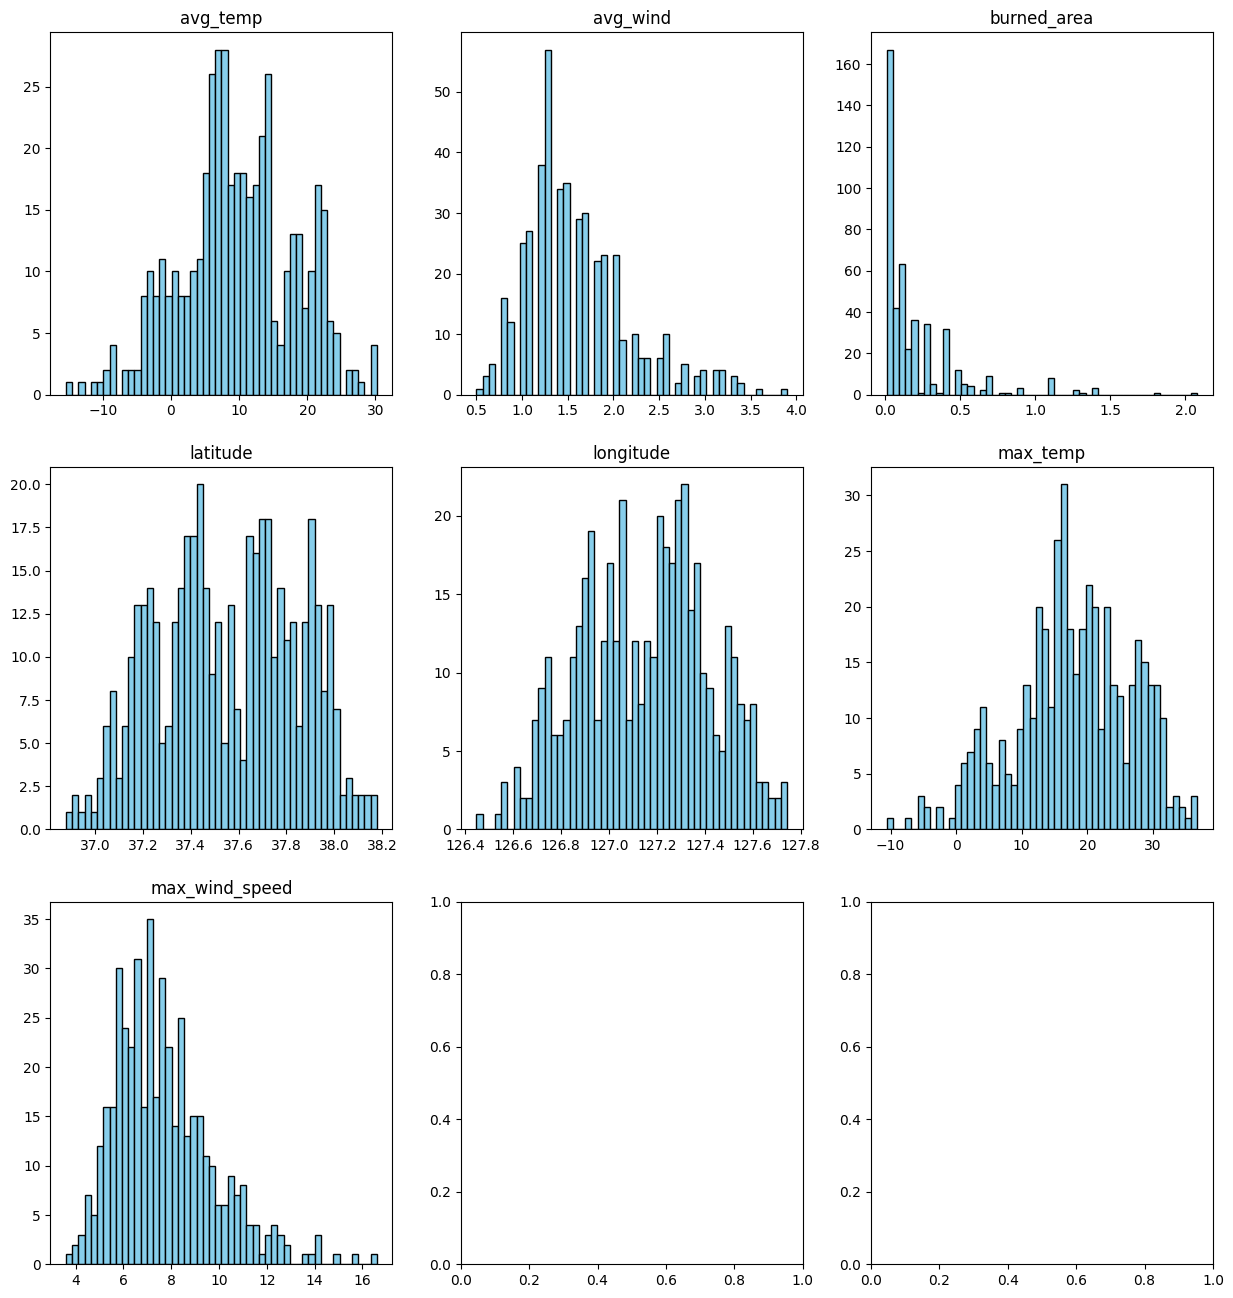

In [11]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(15, 16))

# 평균 기온(avg_temp)
axs[0, 0].hist(fires['avg_temp'], bins=50, color='skyblue', edgecolor='black')
axs[0, 0].set_title('avg_temp')


# 평균 풍속(avg_wind)
axs[0, 1].hist(fires['avg_wind'], bins=50, color='skyblue', edgecolor='black')
axs[0, 1].set_title('avg_wind')


# 화재 발생 면적(burned_area)
axs[0, 2].hist(fires['burned_area'], bins=50, color='skyblue', edgecolor='black')
axs[0, 2].set_title('burned_area')


# 위도(latitude)
axs[1, 0].hist(fires['latitude'], bins=50, color='skyblue', edgecolor='black')
axs[1, 0].set_title('latitude')


# 경도(longitude)
axs[1, 1].hist(fires['longitude'], bins=50, color='skyblue', edgecolor='black')
axs[1, 1].set_title('longitude')

# 최고 온도(max_temp)
axs[1, 2].hist(fires['max_temp'], bins=50, color='skyblue', edgecolor='black')
axs[1, 2].set_title('max_temp')


# 최대 풍속(max_wind_speed)
axs[2, 0].hist(fires['max_wind_speed'], bins=50, color='skyblue', edgecolor='black')
axs[2, 0].set_title('max_wind_speed')



plt.show()


### 1-4 특성 burned_area 왜곡 현상(아래 왼쪽 그림) 개선을 위해 로그 함수(y=ln(burned_area+1))를 이용한 변환 히스토그램 비교

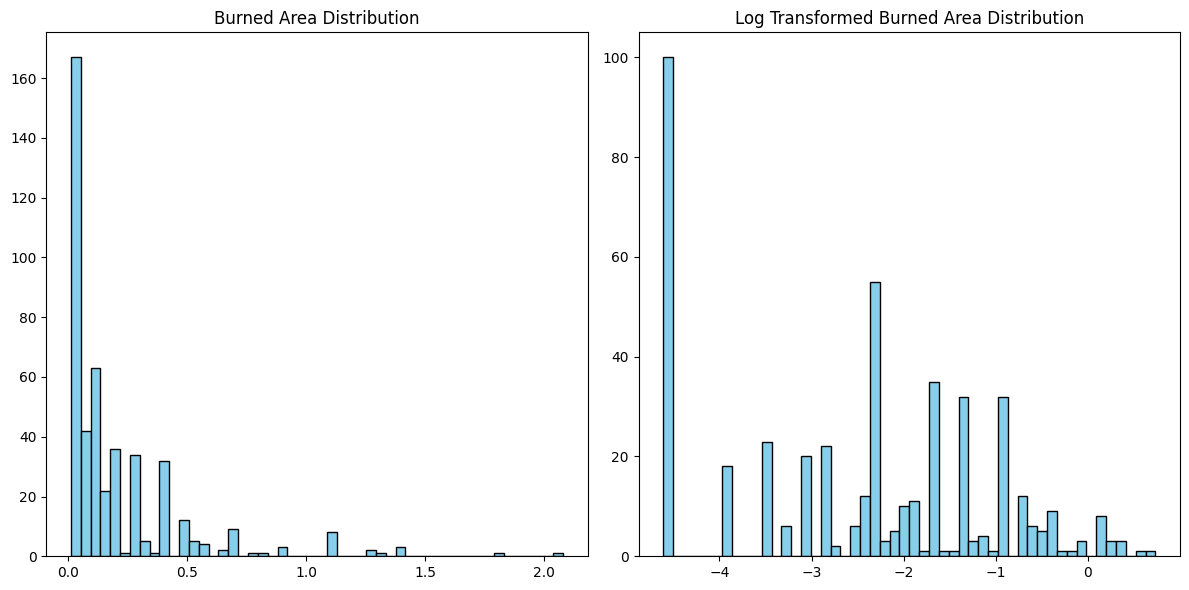

In [12]:
# 화재 발생 면적 데이터에 로그 변환 적용
log_burned_area = np.log(fires['burned_area'])
log_avg_wind = np.log(fires['avg_wind'])

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 로그 변환 전 화재 발생 면적 히스토그램
axs[0].hist(fires['burned_area'], bins=50, color='skyblue', edgecolor='black')
axs[0].set_title('Burned Area Distribution')


# 로그 변환 후 화재 발생 면적 히스토그램
axs[1].hist(log_burned_area, bins=50, color='skyblue', edgecolor='black')
axs[1].set_title('Log Transformed Burned Area Distribution')

plt.tight_layout()
plt.show()

### 1-5 Scikit-Learn의 train_test_split을 이용하여 training/test set 분리 / Test set 비율 확인하기



Month category proportion: 
 month
03-Mar    0.369565
04-Apr    0.217391
02-Feb    0.097826
06-Jun    0.086957
05-May    0.076087
11-Nov    0.032609
01-Jan    0.032609
09-Sep    0.021739
12-Dec    0.021739
10-Oct    0.021739
08-Aug    0.010870
07-Jul    0.010870
Name: count, dtype: float64

Overall month category proportion: 
 month
03-Mar    0.375000
04-Apr    0.219298
02-Feb    0.098684
06-Jun    0.087719
05-May    0.081140
01-Jan    0.032895
11-Nov    0.030702
12-Dec    0.019737
09-Sep    0.017544
10-Oct    0.017544
08-Aug    0.010965
07-Jul    0.008772
Name: count, dtype: float64


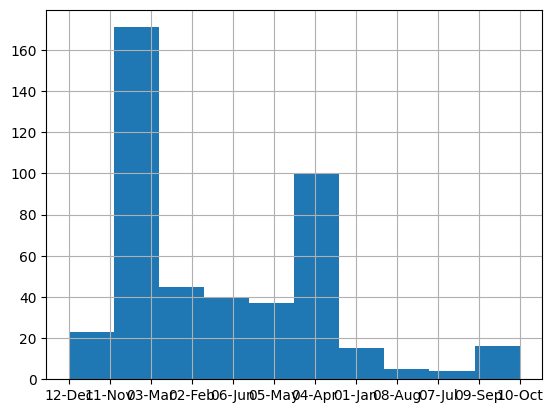

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(fires, test_size=0.2, random_state=42)

test_set.head()

fires["month"].hist()
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(fires, fires["month"]):
  strat_train_set = fires.loc[train_index]
  strat_test_set = fires.loc[test_index]
print("\nMonth category proportion: \n",strat_test_set["month"].value_counts()/len(strat_test_set))
print("\nOverall month category proportion: \n",fires["month"].value_counts()/len(fires))

### 1-6 Pandas scatter_matrix() 함수를 이용하여 4개 이상의 특성에 대해 matrix 출력하기

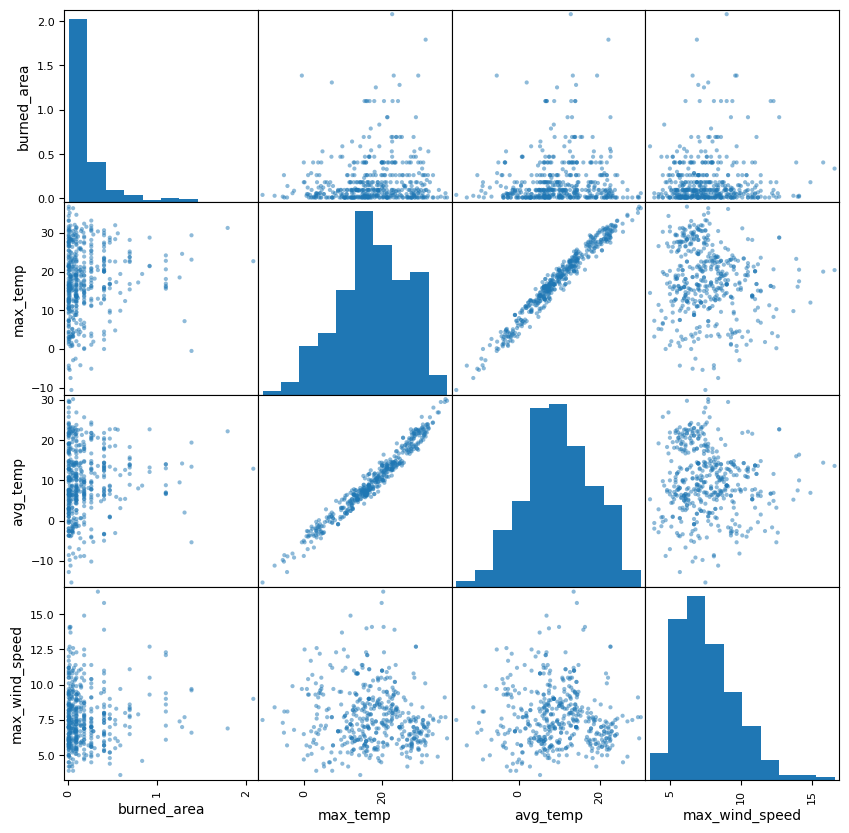

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# scatter_matrix 함수를 사용하여 산점도 행렬 생성
pd.plotting.scatter_matrix(fires[['burned_area', 'max_temp', 'avg_temp', 'max_wind_speed']], figsize=(10, 10))
plt.show()


### 1-7 지역별로 ‘burned_area’에 대해 plot 하기: 원의 반경은 max_temp(옵션 s), 컬러는 burned_area(옵션 c)를 의미


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Axes: xlabel='longitude', ylabel='latitude'>

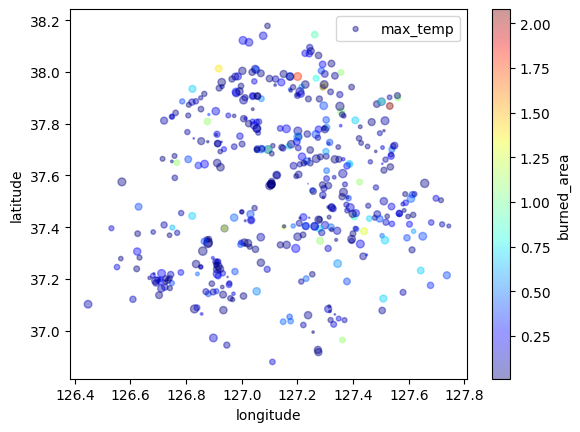

In [15]:
fires.plot(kind="scatter", x="longitude",y="latitude",alpha=0.4,s=fires["max_temp"],label="max_temp",c="burned_area",cmap=plt.get_cmap("jet"),colorbar=True)

### 1-8 corr() 함수를 이용하여 타깃 클래스(burned_area)에 대한 correlation matrix 출력하기

In [16]:
# 문자열 열을 제외한 숫자형 데이터만을 선택하여 상관 행렬 계산
numeric_df = fires.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# 'burned_area'에 대한 상관 계수만 출력
burned_area_corr = correlation_matrix['burned_area']

sorted_corr = burned_area_corr.abs().sort_values(ascending=False)
print(sorted_corr)


burned_area       1.000000
longitude         0.122639
max_temp          0.105072
avg_temp          0.073085
latitude          0.056732
max_wind_speed    0.054658
avg_wind          0.009103
Name: burned_area, dtype: float64


### 1-9 카테고리형 특성 month, day에 대해 OneHotEncoder()를 이용한 인코딩/출력


In [17]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

fires = strat_train_set.drop(["burned_area"], axis=1)
fires_labels = strat_train_set["burned_area"].copy()

# OneHotEncoder 객체 생성
encoder1 = OneHotEncoder()
encoder2 = OneHotEncoder()

# month 특성에 대해 OneHot 인코딩 적용
month_cat_reshape = fires["month"].values.reshape(-1, 1)
cat_month_encoded = encoder1.fit_transform(month_cat_reshape)

# day 특성에 대해 OneHot 인코딩 적용
days_cat_reshape = fires["day"].values.reshape(-1, 1)
cat_day_encoded = encoder2.fit_transform(days_cat_reshape)

print("Encoded month categories:", encoder1.categories_)
print("Encoded day categories:", encoder2.categories_)

Encoded month categories: [array(['01-Jan', '02-Feb', '03-Mar', '04-Apr', '05-May', '06-Jun',
       '07-Jul', '08-Aug', '09-Sep', '10-Oct', '11-Nov', '12-Dec'],
      dtype=object)]
Encoded day categories: [array(['00-sun', '01-mon', '02-tue', '03-wed', '04-thu', '05-fri',
       '06-sat', '07-hol'], dtype=object)]


In [18]:
fires_num = fires.drop(["month", "day"], axis=1)

selected_columns = ['month', 'day']
fires_selected = fires[selected_columns]

# 인코딩된 month와 day를 DataFrame으로 변환
encoded_month_df = pd.DataFrame(cat_month_encoded.toarray(), columns=encoder1.get_feature_names_out(["month"]))
encoded_day_df = pd.DataFrame(cat_day_encoded.toarray(), columns=encoder2.get_feature_names_out(["day"]))

# 인코딩된 month와 day를 fires_num에 추가
fires_string_encoded = pd.concat([encoded_day_df, encoded_month_df], axis=1)

fires_string_encoded.dropna(axis=0, inplace=True)

fires_string_encoded.reset_index(drop=True, inplace=True)

# 결과 출력
print("Encoded features:")

print(fires_string_encoded)


Encoded features:
     day_00-sun  day_01-mon  day_02-tue  day_03-wed  day_04-thu  day_05-fri  \
0           0.0         0.0         0.0         0.0         0.0         1.0   
1           0.0         0.0         1.0         0.0         0.0         0.0   
2           0.0         0.0         0.0         1.0         0.0         0.0   
3           0.0         0.0         1.0         0.0         0.0         0.0   
4           0.0         0.0         0.0         1.0         0.0         0.0   
..          ...         ...         ...         ...         ...         ...   
359         0.0         0.0         1.0         0.0         0.0         0.0   
360         0.0         0.0         0.0         0.0         0.0         1.0   
361         0.0         0.0         1.0         0.0         0.0         0.0   
362         0.0         0.0         0.0         1.0         0.0         0.0   
363         0.0         0.0         1.0         0.0         0.0         0.0   

     day_06-sat  day_07-hol  mont

### 1-10 Scikit-Learn의 Pipeline, StandardScaler를 이용하여 카테고리형 특성을 인코딩한 training set 생성하기

In [19]:
print("\n\n########################################################################")
print("Now let's build a pipeline for preprocessing the numerical attributes:")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
('std_scaler', StandardScaler()),
])

num_attribs = fires_num.columns
cat_attribs = fires_selected.columns

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

fires_prepared = full_pipeline.fit_transform(fires)



########################################################################
Now let's build a pipeline for preprocessing the numerical attributes:


### 2-1 GridSearchCV를 통해 Best 모델 구하기


In [20]:

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svm_reg = SVR()

print("svm_reg.get_params().keys(): ", svm_reg.get_params().keys())
params = {'kernel': ["linear", "poly", "rbf"],
          'C': [0.1],#, 1, 10, 100
          'degree': [2],#, 3, 4
          'epsilon':[0.1, 1.0, 1.5]}

grid_search_cv = GridSearchCV(svm_reg, params, verbose=1, cv=10)
grid_search_cv.fit(fires_prepared, fires_labels)

svm_best_model_cv = grid_search_cv.best_estimator_


svm_reg.get_params().keys():  dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])
Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [21]:
# 최적의 SVM 모델을 가져오기
svm_best_model_cv = grid_search_cv.best_estimator_

# 데이터에 모델 학습
svm_best_model_cv.fit(fires_prepared, fires_labels)


SVR(C=0.1, degree=2, kernel='linear')

### 2-2 mean_squared_error 이용 => training set에 대해 RMSE 구하기

In [22]:
from sklearn.metrics import mean_squared_error

fires_predictions = svm_best_model_cv.predict(fires_prepared)
svm_mse = mean_squared_error(fires_labels, fires_predictions)
svm_rmse = np.sqrt(svm_mse)

# revert into the original value: y=ln(burned_area+1) => burned_area = exp(y)-1
svm_rmse_reverted = np.exp(svm_rmse)-1
print("\nSVM - RMSE(train set):\n", svm_rmse_reverted)


SVM - RMSE(train set):
 0.2830435088558714


### 2-3 각 모델에 대한 학습 곡선(learning curves) 그리기


In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

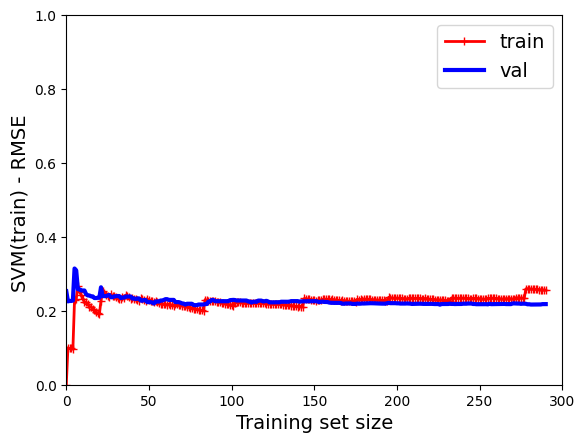

In [24]:
plot_learning_curves(svm_best_model_cv, fires_prepared, fires_labels)
plt.axis([0, 300, 0, 1])                         # not shown in the book
plt.ylabel('SVM(train) - RMSE ')

plt.show()


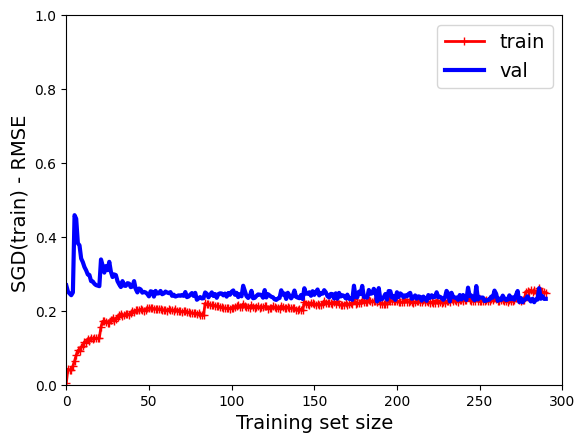

In [25]:
from sklearn.linear_model import SGDRegressor

sgd_regression = Pipeline([
    ("sgd_reg", SGDRegressor(max_iter=500, tol=1e-3, penalty=None, eta0=0.1)),
])

plot_learning_curves(sgd_regression, fires_prepared, fires_labels)
plt.axis([0, 300, 0, 1])  # not shown
plt.ylabel('SGD(train) - RMSE ')

plt.show()  # not shown


### 2-4 cross_val_score를 이용하여 RMSE score 출력하기


In [26]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(svm_best_model_cv, fires_prepared, fires_labels, scoring="neg_mean_squared_error", cv=10)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

lin_rmse_scores = np.sqrt(-lin_scores)
print("\nLinear Regression scores (train set): \n")
display_scores(lin_rmse_scores)


Linear Regression scores (train set): 

Scores: [0.32643423 0.20501468 0.2431273  0.12649986 0.30965571 0.28318396
 0.36723721 0.134764   0.25300845 0.18938756]
Mean: 0.24383129717424148
Standard deviation: 0.07625723272583035


### 2-5 mean_squared_error 이용 => test set에 대해 RMSE 구하기


In [27]:
lin_scores = cross_val_score(svm_best_model_cv, fires_prepared, fires_labels, scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
print("\nLinear Regression scores (test set): \n")
display_scores(lin_rmse_scores)


Linear Regression scores (test set): 

Scores: [0.32643423 0.20501468 0.2431273  0.12649986 0.30965571 0.28318396
 0.36723721 0.134764   0.25300845 0.18938756]
Mean: 0.24383129717424148
Standard deviation: 0.07625723272583035


In [28]:
import tensorflow as tf
from tensorflow import keras
X_train, X_valid, y_train, y_valid = train_test_split(fires_prepared, fires_labels, test_size=0.2,random_state=42)
X_test = X_valid
y_test = y_valid
np.random.seed(42)
tf.random.set_seed(42)
mlp_model = keras.models.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(1)
  ])
mlp_model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = mlp_model.fit(X_train, y_train, epochs=200, validation_data=(X_valid, y_valid))
mse_test = mlp_model.evaluate(X_test, y_test)
X_new = X_test[:10]
y_pred = mlp_model.predict(X_new)

Epoch 1/200
10/10 [==============================] - 1s 30ms/step - loss: 0.1476 - val_loss: 0.0856
Epoch 2/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0855 - val_loss: 0.0714
Epoch 3/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0759 - val_loss: 0.0683
Epoch 4/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0733 - val_loss: 0.0678
Epoch 5/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0723 - val_loss: 0.0673
Epoch 6/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0714 - val_loss: 0.0670
Epoch 7/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0707 - val_loss: 0.0668
Epoch 8/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0699 - val_loss: 0.0649
Epoch 9/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0687 - val_loss: 0.0643
Epoch 10/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0681 - val_loss: 0.0652
Epo

1/1 [==============================] - 0s 40ms/step


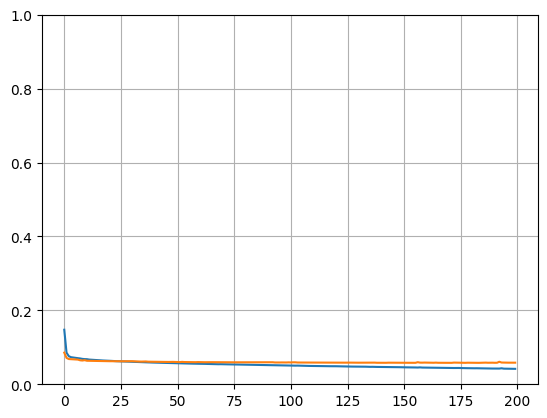

In [29]:
X_new = X_test[:10]
y_pred = mlp_model.predict(X_new)
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [30]:
print(X_train)

[[-0.62109753 -1.91555898 -0.26671512 ...  0.          1.
   0.        ]
 [ 0.77308301  0.07688131  1.37836541 ...  0.          0.
   0.        ]
 [-0.54026494 -1.45068325 -0.53680297 ...  0.          0.
   0.        ]
 ...
 [-0.51913979  2.25106179 -1.12608555 ...  0.          0.
   0.        ]
 [ 1.39194664 -0.78962658  0.99778708 ...  0.          0.
   0.        ]
 [ 0.93400493 -1.45629843 -1.31023636 ...  0.          0.
   0.        ]]


In [33]:
tf.keras.models.save_model(mlp_model,'/nmymodel')
